In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import math
from helper import save_data,load_data
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import mnist_reader

In [2]:
#pls use original Fashion-mnist dataset from github 
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')


In [3]:
training_data=(X_train>127)
validating_data=(X_test>127)


In [4]:
def sigmoid(x):
    x=np.array(x)
    return 1 / (1 + np.exp(-x))

In [5]:
def sampleH(W,c,u):
    #        
    p=sigmoid(c+np.matmul(W,u))
    h=np.random.binomial(1,p)
    return h.astype(np.bool)
def sampleU(W,b,h):
    p=sigmoid(b+np.matmul(W.T,h))
    v=np.random.binomial(1,p)
    return v.astype(np.bool)

In [6]:
def RBM(hlen,D,k=1,epochs=20,eta=0.01,data=None): 
    
    vlen=D.shape[1]
    lost=[]
    if data is None:
        W=np.random.normal(0,0.01,(hlen,vlen))
        b=np.random.normal(0,0.01,(vlen,1))
        c=np.random.normal(0,0.01,(hlen,1))
    else:
        W,b,c=data

    
    for epoch in range(epochs):
        loss=0
        step=0
        for v in D:
            step+=1
            u=v #u is actually v0
            u=np.expand_dims(u,1)
            for t in range(k):
                h=sampleH(W,c,u)
                u=sampleU(W,b,h)
                
            v=np.expand_dims(v,axis=1)

            W += eta*(np.matmul(sigmoid(np.matmul(W,v)+c),v.T)-np.matmul(sigmoid(np.matmul(W,u)+c),u.T))
            b += eta*(v.astype(np.int8) -u.astype(np.int8))
            c += eta*(sigmoid(np.matmul(W,v)+c)-sigmoid(np.matmul(W,u)+c))
            loss+=np.sum(np.abs(v.astype(np.int8) -u.astype(np.int8)))
        print 'epoch %d , loss %.4f'%(epoch,loss/len(D))
        lost.append(loss/len(D))
    return W,b,c,lost

In [ ]:
W,b,c,lost=RBM(hlen=100,D=training_data,epochs=20)

In [ ]:
hids=[sampleH(W,c,np.expand_dims(u,1)) for u in validating_data]
hids=np.array(hids)[:,:,0]

In [24]:
def tsne_plot(instances,labels,data=None):
    if data is None:
        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23,verbose=1)
        new_values = tsne_model.fit_transform(instances)
    else:
        new_values = data
    print 'plotting'
    plt.figure(figsize=(16, 16)) 
    plt.scatter(new_values[:,1],new_values[:,0], c=labels, cmap=plt.cm.get_cmap("jet", 10))
    cbar=plt.colorbar(ticks=range(10))
    cbar.set_ticklabels(['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
    plt.clim(-0.5, 9.5)
    plt.savefig('plts/tsne_256.eps',format='eps')
    plt.show()
    return new_values

plotting


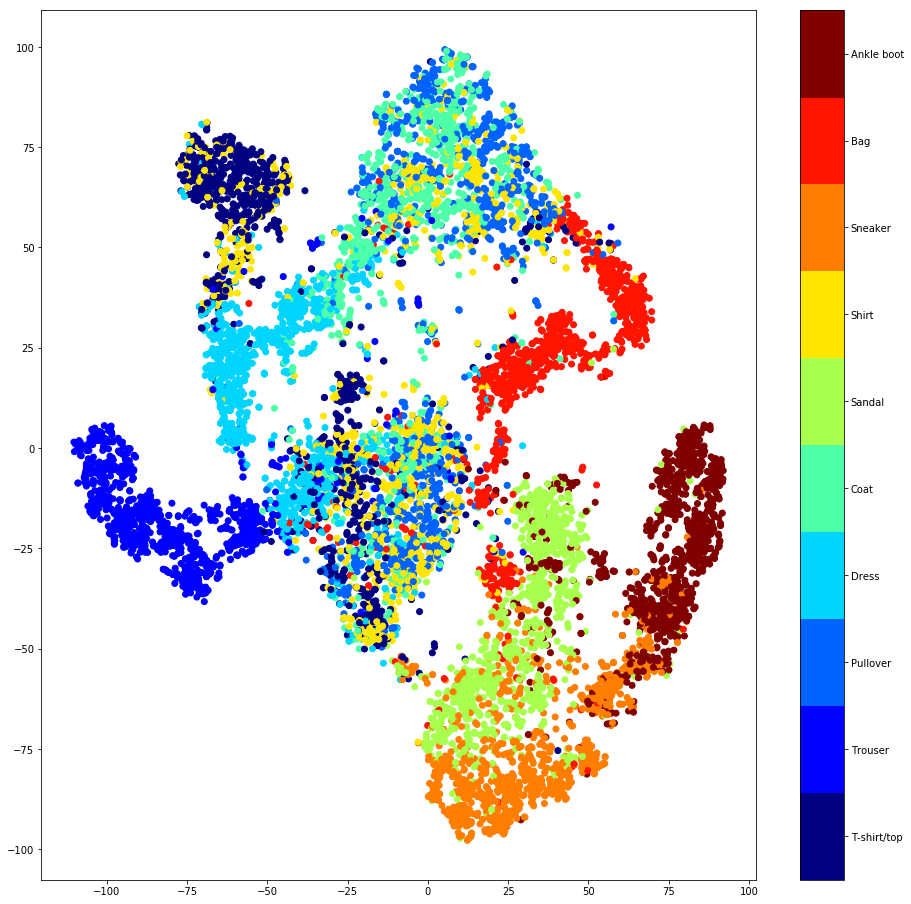

In [25]:
newVals=tsne_plot(hids,y_test)